# pyInterDemand
## Biblioteca de demanda intermitente

La previsión de la demanda es un componente fundamental de la gestión de la cadena de suministro y las operaciones comerciales. Si bien los métodos tradicionales de la demanda se centran en patrones de demanda continuos y estables, la **demanda intermitente**, caracterizada por compras **irregulares** o **esporádicas**, presenta desafíos únicos. **pyInterDemand** es una biblioteca de Python diseñada para abordar estos desafíos, ofreciendo un conjunto completo de algoritmos adaptados a la previsión de la demanda intermitente.

Los algoritmos soportados son:

- **Croston**: El método de Croston separa los datos de demanda intermitente en dos secuencias: una para la demanda no nula y otra para los intervalos entre demandas no nulas. Posteriormente, el método aplica un suavizado exponencial independiente a ambas.

- **SBA (Aproximación de Syntetos y Boylan)**: Este enfoque extiende el método de Croston ajustando el parámetro de suavizado en función del sesgo en el error de pronóstico.

- **SBJ (Syntetos, Boylan & Johnston)**: Una evolución del método SBA, SBJ introduce un parámetro adicional para optimizar aún más la estimación.

- **TSB (Teunter, Syntetos & Babai)**: TSB ofrece una modificación del método de Croston para mejorar la precisión del pronóstico al actualizar dinámicamente el parámetro de suavizado.

- **HES (Suavizado Hiperbólico-Exponencial)**: Es una técnica de suavizado exponencial generalizada adaptada para escenarios de demanda intermitente.

- **LES (Suavizado Exponencial Lineal)**: LES emplea una función lineal para modelar la demanda, suavizando los puntos de datos a lo largo del tiempo.

- **SES (Suavizado Exponencial Simple)**: La más sencilla de las técnicas, SES aplica un decaimiento exponencial exponencial a las observaciones pasadas.

In [21]:
# Install
#%pip install pyInterDemand
%pip install pandas
%pip install numpy
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyInterDemand.algorithm.intermittent import plot_int_demand
from pyInterDemand.algorithm.intermittent import classification
from pyInterDemand.algorithm.intermittent import mase
from pyInterDemand.algorithm.intermittent import rmse
from pyInterDemand.algorithm.intermittent import croston_method
from pyInterDemand.algorithm.intermittent import sba_method
from pyInterDemand.algorithm.intermittent import sbj_method
from pyInterDemand.algorithm.intermittent import tsb_method
from pyInterDemand.algorithm.intermittent import hes_method
from pyInterDemand.algorithm.intermittent import les_method
from pyInterDemand.algorithm.intermittent import ses_method

In [9]:
# Load Dataset
data = {
        'DATE': pd.Series(['21/08/2020','22/08/2020', '23/08/2020', '24/08/2020', '25/08/2020', '26/08/2020', '27/08/2020', '28/08/2020', '29/08/2020', '30/08/2020', '31/08/2020', '01/09/2020']),
       'Value': pd.Series([5, 10, 0, 0, 0, 0, 7, 0, 0, 0, 6, 0])
       }
dataset         = pd.DataFrame(data)
dataset['DATE'] = pd.to_datetime(dataset['DATE'], dayfirst = True).map(lambda x: x.strftime('%d-%m-%Y'))

In [ ]:
# Prepare Time Series TS
ts       = dataset['Value'].copy(deep = True)
ts.index = pd.DatetimeIndex(dataset['DATE'], dayfirst = True)
ts       = ts.sort_index()
ts       = ts.reindex(pd.date_range(ts.index.min(), ts.index.max()), fill_value = 0)
ts       = ts.loc[ts[(ts != 0)].first_valid_index():]
print('')
print('Total Number of Observations: ', ts.shape[0])
print('Total Number of Zeros: ', len(ts[ts == 0]))
print('Start Date: ', ts.index[0])
print('End Date: '  , ts.index[-1])
print('')


Total Number of Observations:  12
Total Number of Zeros:  8
Start Date:  2020-08-21 00:00:00
End Date:  2020-09-01 00:00:00



In [11]:
# Time Series Classification
adi, cv_sq = classification(ts)

ADI:  3.0 , CV:  3.611 , Type:  Lumpy


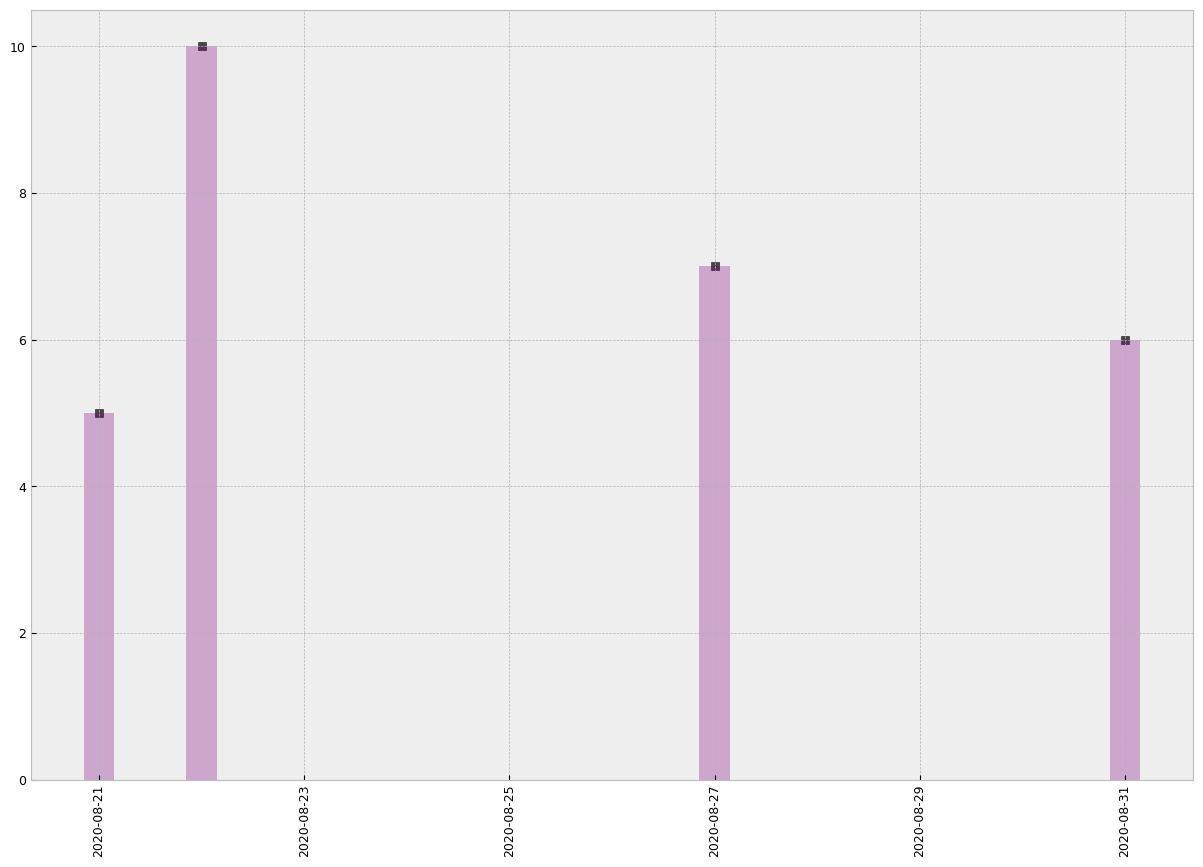

In [15]:
# Time Series Plot
plot_int_demand(ts, size_x = 15, size_y = 10, bar_width = 0.3)

C:\Users\alade\AppData\Roaming\Python\Python312\site-packages\pyInterDemand\algorithm\intermittent.py:105: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v_i[0]        = ts[0]
C:\Users\alade\AppData\Roaming\Python\Python312\site-packages\pyInterDemand\algorithm\intermittent.py:105: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  v_i[0]        = ts[0]
C:\Users\alade\AppData\Roaming\Python\Python312\site-packages\pyInterDemand\algorithm\intermittent.py:106: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Da

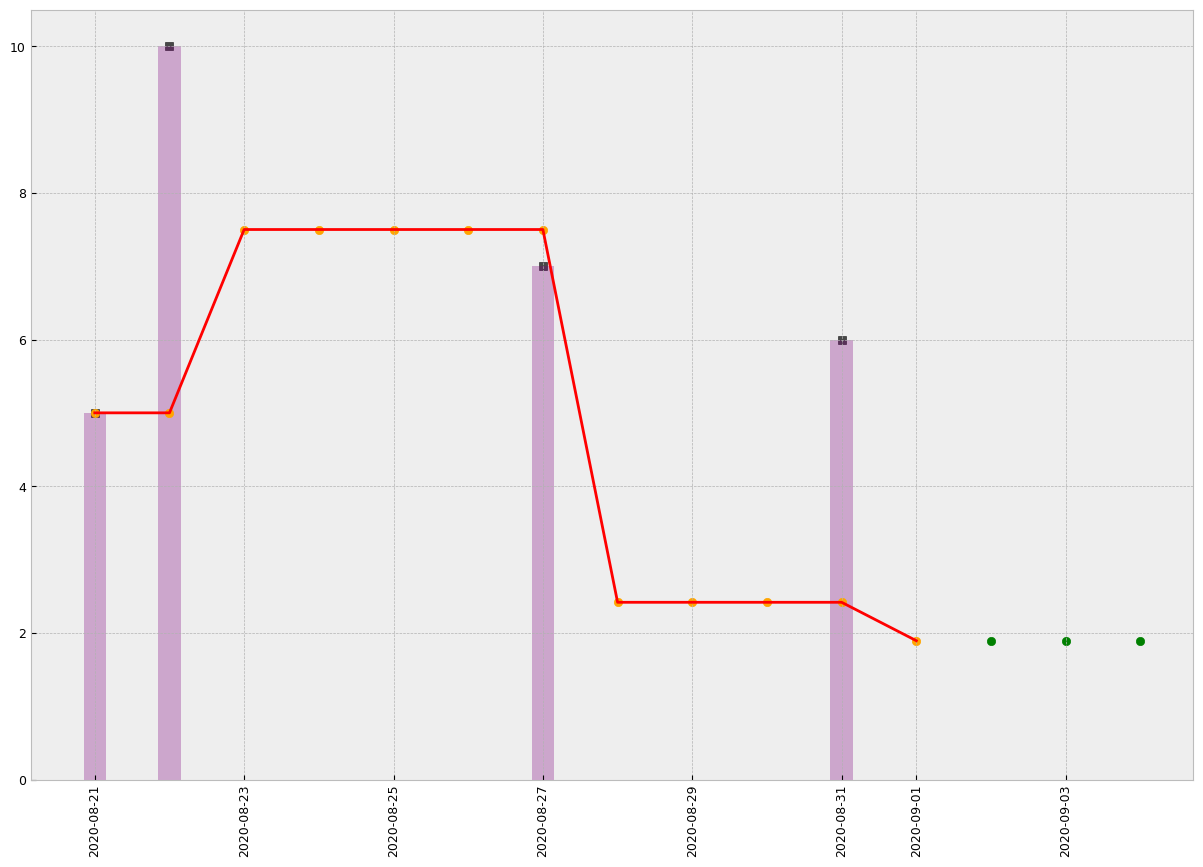

In [20]:
# Croston
v, q, forecast = croston_method(ts, alpha = 0.5, n_steps = 4)
plot_int_demand(ts, size_x = 15, size_y = 10, bar_width = 0.3, prediction = forecast)

In [14]:
# Error
print('MASE = ', round(mase(ts, forecast), 3), ', RMSE = ', round(rmse(ts, forecast), 3))

MASE =  1.078 , RMSE =  4.867


C:\Users\alade\AppData\Roaming\Python\Python312\site-packages\pyInterDemand\algorithm\intermittent.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  divisor = divisor + abs(ts[i] - ts[i-1])
